# π Approximation Methods: Final Comparison

This notebook compares different methods for approximating π (pi), including:
- **Leibniz Series**
- **Monte Carlo Simulation**
- **Chudnovsky Algorithm**
- **Buffon's Needle (if needed)**
- **Wallis Product**

Each method includes estimated value of π, error, and time taken.

In [1]:
import math
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

true_pi = math.pi

methods = []
estimates = []
errors = []
times = []

In [2]:
# Leibniz Method
def leibniz_pi(n_terms):
    pi_est = 0
    for k in range(n_terms):
        pi_est += ((-1)**k) / (2*k + 1)
    return 4 * pi_est

start = time.time()
pi_l = leibniz_pi(1000000)
time_l = time.time() - start
err_l = abs(true_pi - pi_l)

methods.append("Leibniz")
estimates.append(pi_l)
errors.append(err_l)
times.append(time_l)

In [3]:
# Monte Carlo
def monte_carlo_pi(n_points):
    inside = 0
    for _ in range(n_points):
        x, y = random.random(), random.random()
        if x*x + y*y <= 1:
            inside += 1
    return (inside / n_points) * 4

start = time.time()
pi_mc = monte_carlo_pi(1000000)
time_mc = time.time() - start
err_mc = abs(true_pi - pi_mc)

methods.append("Monte Carlo")
estimates.append(pi_mc)
errors.append(err_mc)
times.append(time_mc)

In [4]:
# Chudnovsky Algorithm
def chudnovsky_pi(n_terms):
    C = 426880 * math.sqrt(10005)
    M = 1
    L = 13591409
    X = 1
    K = 6
    S = L

    for i in range(1, n_terms):
        M *= (K**3 - 16*K) // (i**3)
        L += 545140134
        X *= -262537412640768000
        S += (M * L) / X
        K += 12

    return C / S

start = time.time()
pi_c = chudnovsky_pi(3)
time_c = time.time() - start
err_c = abs(true_pi - pi_c)

methods.append("Chudnovsky")
estimates.append(pi_c)
errors.append(err_c)
times.append(time_c)

In [5]:
# Wallis Product
def wallis_pi(n_terms):
    product = 1.0
    for i in range(1, n_terms):
        product *= (4 * i * i) / (4 * i * i - 1)
    return 2 * product

start = time.time()
pi_w = wallis_pi(1000000)
time_w = time.time() - start
err_w = abs(true_pi - pi_w)

methods.append("Wallis")
estimates.append(pi_w)
errors.append(err_w)
times.append(time_w)

In [6]:
# Final DataFrame
df = pd.DataFrame({
    "Method": methods,
    "Estimated π": estimates,
    "Error": errors,
    "Time (s)": times
})
df

,Method,Estimated π,Error,Time (s)
0,Leibniz,3.141592,1.000000e-06,0.420950
1,Monte Carlo,3.142804,1.211346e-03,0.406214
2,Chudnovsky,3.141593,0.000000e+00,0.000000
3,Wallis,3.141592,7.853984e-07,0.327368


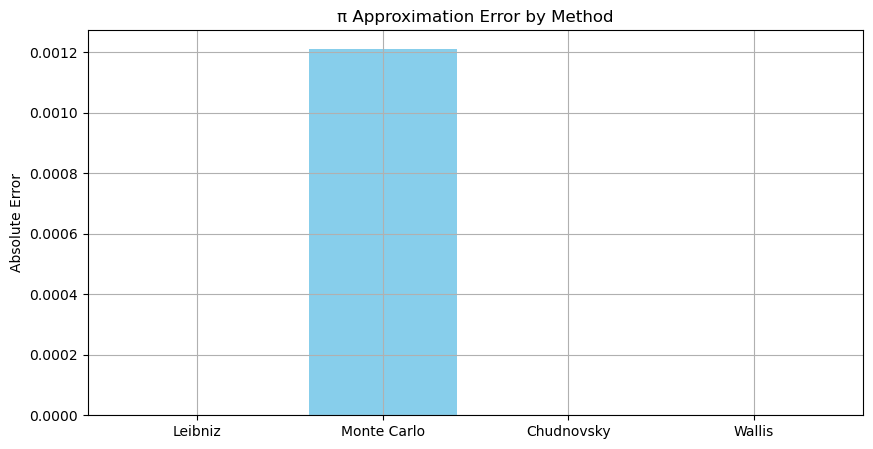

In [7]:
# Visual Comparison
plt.figure(figsize=(10, 5))
plt.bar(df['Method'], df['Error'], color='skyblue')
plt.ylabel("Absolute Error")
plt.title("π Approximation Error by Method")
plt.grid(True)
plt.show()